# Praca domowa 6

## Zadanie 1


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/MI2-Education/2023L-ExploratoryDataAnalysis/main/homeworks/hw6/house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [35]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [36]:
df[["waterfront", "grade", "price"]].loc[(df.grade >= np.median(df.grade)) & (df.waterfront == 1) ].price.agg("mean")

1784151.7006802722

*Odp*: średnia cena wynosi 1784151.7006802722

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [37]:
df[["floors", "bathrooms"]].loc[(df.floors == 2) | (df.floors==3)].groupby("floors").bathrooms.agg("median")

floors
2.0    2.5
3.0    2.5
Name: bathrooms, dtype: float64

Odp: Nie mają większej (mają taką samą)

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [38]:
North = (df.lat.max() + df.lat.min())/2
North
df[["lat", "grade"]].loc[df.lat > North].grade.quantile([0.25, 0.75])

0.25    7.0
0.75    8.0
Name: grade, dtype: float64

Odp: Kwantyl 0.25 wynosi 7.0 a kwantyl 0.75 wynosi 8.0

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [39]:
max_zc = df.groupby("zipcode").zipcode.agg("count").sort_values(ascending = False).head(1)
max_zc
# Zatem najczęściej występuje kod 98103, występuje 602 razy

zipcode
98103    602
Name: zipcode, dtype: int64

In [40]:
# Rozstęp między kwartylowy
df.loc[df.zipcode == 98103].price.quantile(0.75) - df.loc[df.zipcode == 98103].price.quantile(0.25)

262875.0

Odp: Pod kodem pocztowym 98103 i rozstęp międzykwartylowy cen wynosi dla nich 262875.0

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [41]:
# Otrzymamy wynik w procentach
100*(df[["sqft_living15", "sqft_living"]].loc[df.sqft_living15 > df.sqft_living].shape[0]/ df[["sqft_living15", "sqft_living"]].shape[0])

42.594734650441865

Odp: takich nieruchomości jest 42.594734650441865%

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [9]:
North = (df.lat.max() + df.lat.min())/2
west = (df.long.max() + df.long.min())/2
SE = df[["lat", "long"]].loc[(df.lat < North) & (df.long > west)].long.count()
SE
NW = df[["lat", "long"]].loc[(df.lat > North) & (df.long < west)].long.count()
NW
Procent = ((NW - SE)/SE)*100
Procent

18343.529411764706

Odp: 18343.529411764706%

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

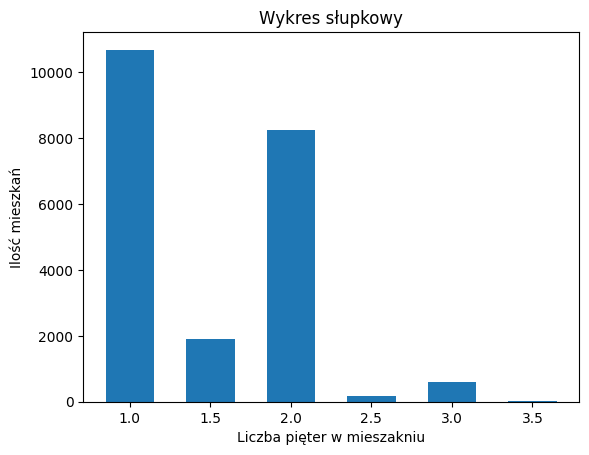

In [80]:
pietra = df.groupby(["floors"]).agg({"id": "count"}).reset_index().sort_values(["floors", "id"])
plt.bar(pietra.floors, pietra.id, width = 0.3)
plt.xlabel('Liczba pięter w mieszakniu')
plt.ylabel('Ilość mieszkań')
plt.title('Wykres słupkowy')
plt.show()


In [82]:
import seaborn as sns

b)

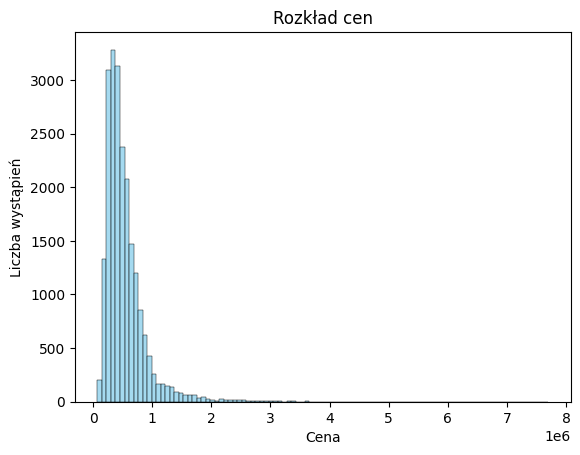

In [92]:
sns.histplot(data=df, x= 'price' , bins=100, color='skyblue')
plt.title('Rozkład cen')
plt.xlabel('Cena')
plt.ylabel('Liczba wystąpień')
plt.show()

c)

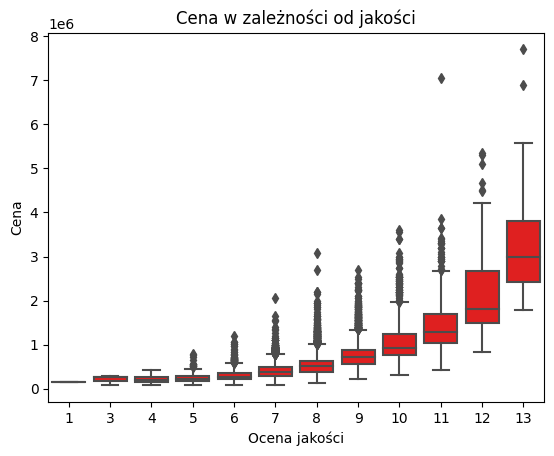

In [93]:
ceny = df[["grade", "price"]]
sns.boxplot(data=ceny, x = 'grade', y = 'price', color='r')
plt.title('Cena w zależności od jakości')
plt.xlabel('Ocena jakości')
plt.ylabel('Cena')
plt.show()